<a href="https://colab.research.google.com/github/Gabrielghj/Trading-Patron-W/blob/main/Trading_Patron_W.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Importación de librerías

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema


2. Generación de datos simulados

In [ ]:
def load_data():
    np.random.seed(42)
    dates = pd.date_range(start="2023-01-01", periods=100)
    prices = 100 + np.cumsum(np.random.normal(0, 1, size=100))
    return pd.DataFrame({'Date': dates, 'Close': prices})


3. Detección de patrones "W"

In [ ]:
def detect_pattern_w(data, lookback=5):
    data['Min'] = data['Close'][argrelextrema(data['Close'].values, np.less_equal, order=lookback)[0]]
    data['Max'] = data['Close'][argrelextrema(data['Close'].values, np.greater_equal, order=lookback)[0]]

    patterns = []
    for i in range(len(data) - 3):
        if (
            not np.isnan(data['Min'].iloc[i]) and
            not np.isnan(data['Max'].iloc[i + 1]) and
            not np.isnan(data['Min'].iloc[i + 2]) and
            data['Min'].iloc[i] <= data['Min'].iloc[i + 2]

            ):
            patterns.append(i)
    return patterns


In [ ]:
# 3. Función para graficar
def plot_patterns(data, patterns):
    plt.figure(figsize=(14, 7))
    plt.plot(data['Date'], data['Close'], label="Precio", color='blue')
    plt.scatter(data['Date'], data['Min'], color='red', label="Mínimos Relativos", alpha=0.6)
    plt.scatter(data['Date'], data['Max'], color='green', label="Máximos Relativos", alpha=0.6)

    # Resaltar patrones W
    for pattern_idx in patterns:
        start = pattern_idx
        end = pattern_idx + 3
        plt.plot(data['Date'].iloc[start:end], data['Close'].iloc[start:end], color='orange', linewidth=2)
        plt.axhline(data['Max'].iloc[start + 1], color='purple', linestyle='--', alpha=0.7, label="Resistencia (Objetivo)")

    plt.title("Detección de Patrones W en Precios")
    plt.legend()
    plt.show()

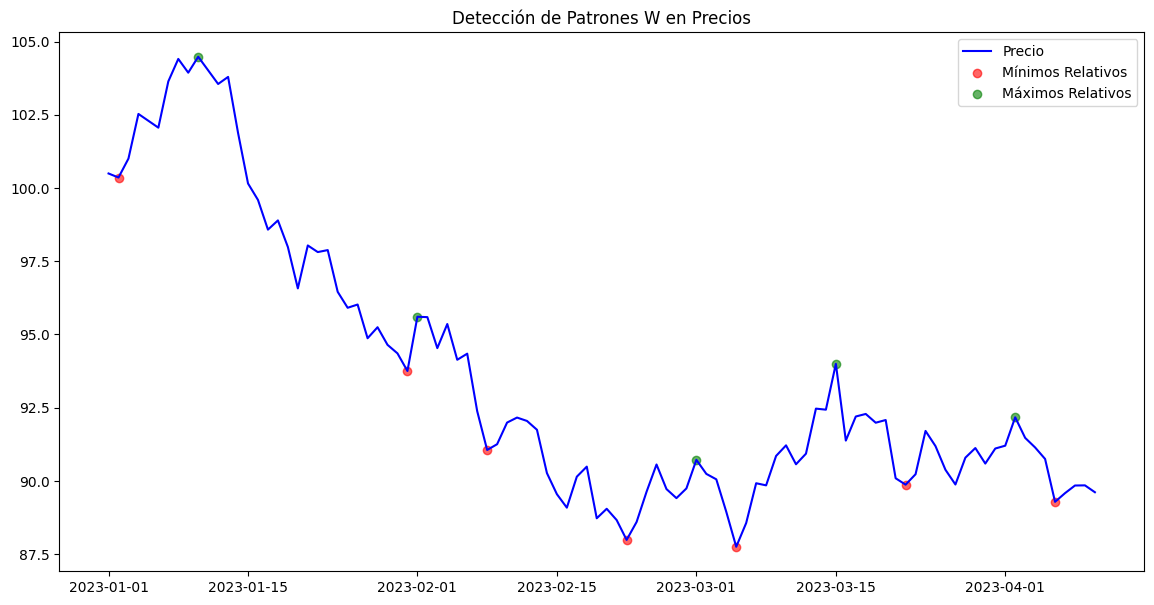

In [ ]:
# 4. Integración
data = load_data()
patterns = detect_pattern_w(data)
plot_patterns(data, patterns)